In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()


In [3]:
data = pd.read_csv("data/car_ad.csv")
df = data.copy()

In [5]:
df.shape

(9576, 10)

In [7]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [8]:
df.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [9]:
df[df['mileage'] == 0].count()

car             348
price           348
body            348
mileage         348
engV            329
engType         348
registration    348
year            348
model           348
drive           335
dtype: int64

In [10]:
df[df['mileage'] == 0].year.value_counts()

2016    294
2015     35
2014     10
2012      3
2003      1
2005      1
2006      1
2007      1
2008      1
2009      1
Name: year, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [12]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

### Plot correlations 

In [13]:
data = df[:150]

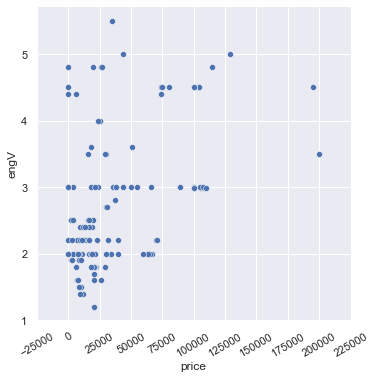

In [14]:
sns.relplot(x="price", y="engV", data=data).set_xticklabels(rotation=30)

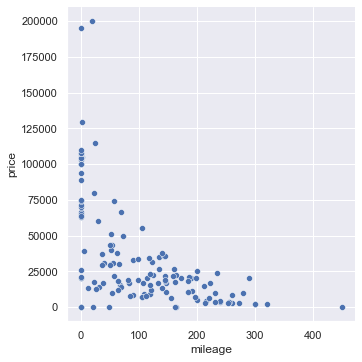

In [15]:
sns.relplot(x="mileage", y="price", data=data)

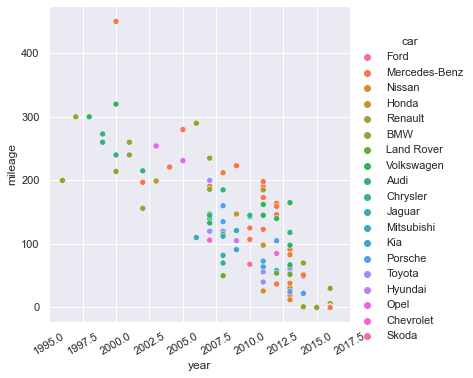

In [16]:
sns.relplot(x="year", y="mileage", hue="car", data=data).set_xticklabels(rotation=30);

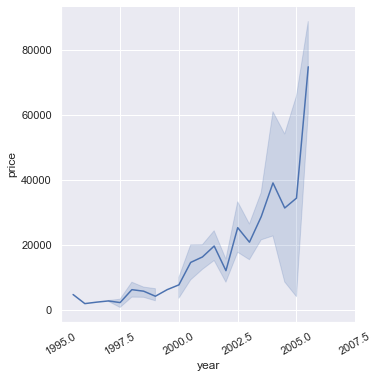

In [17]:
sns.relplot(x="year", y="price", kind="line", data=data).set_xticklabels(rotation=30);

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'engV'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

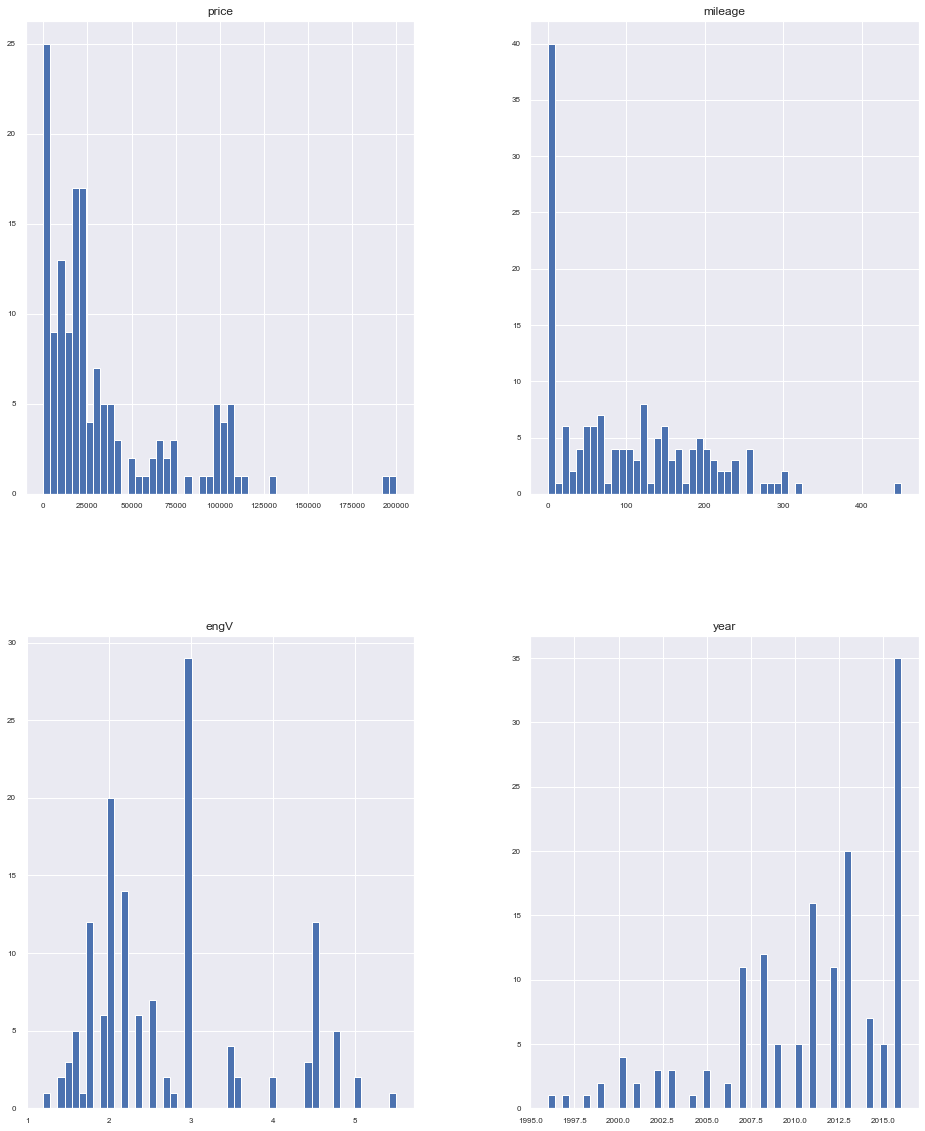

In [18]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [19]:
data = df.dropna()

<AxesSubplot:>

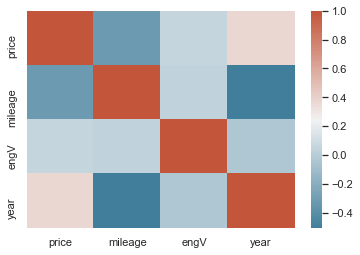

In [20]:
corr = data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

In [21]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))

<AxesSubplot:>

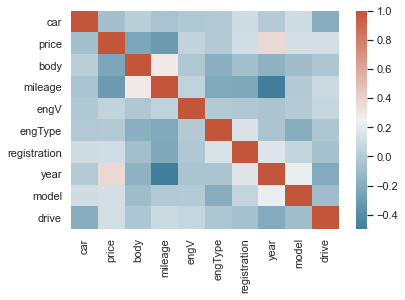

In [22]:
corr = df.corr()
sns.heatmap(corr, cmap=cmap)

In [24]:
data[data.engV > 9]

,car,price,body,mileage,engV,engType,registration,year,model,drive
184,Audi,4600.0000,vagon,242,99.99,Diesel,no,2004,A6,front
256,Subaru,14000.0000,crossover,171,99.99,Petrol,yes,2010,Forester,full
1116,Renault,0.0000,van,192,99.99,Diesel,yes,2011,Kangoo ����.,front
1158,Audi,4000.0000,sedan,260,99.99,Diesel,no,2000,A6,full
1647,Volkswagen,11350.0000,van,190,75.00,Diesel,yes,2011,T5 (Transporter) ����,front
1672,ZAZ,1800.0000,hatch,150,99.99,Gas,yes,2004,1102 ������,front
1752,Mazda,12850.0000,crossover,125,99.99,Other,yes,2009,CX-7,full
2321,VAZ,1250.0000,sedan,150,99.99,Gas,yes,1987,2105,rear
3254,Renault,6100.0000,van,280,90.00,Diesel,yes,2008,Kangoo ����.,front
3314,Volkswagen,10800.0000,sedan,63,20.00,Petrol,yes,2007,Passat B6,front


In [25]:
data[data.engV < 0.8]

,car,price,body,mileage,engV,engType,registration,year,model,drive
308,Nissan,17700.0,hatch,21,0.11,Other,yes,2014,Leaf,front
403,Nissan,15700.0,hatch,22,0.11,Other,yes,2013,Leaf,front
530,Smart,2300.0,hatch,91,0.60,Petrol,no,2002,Fortwo,rear
1210,BMW,38888.0,vagon,5,0.65,Other,yes,2015,I3,rear
1377,Smart,4300.0,other,108,0.60,Petrol,yes,2002,Fortwo,rear
1694,Smart,3100.0,other,103,0.60,Petrol,yes,2000,Fortwo,rear
2485,Tesla,99000.0,sedan,15,0.70,Other,yes,2015,Model S,full
2813,Smart,5600.0,other,158,0.70,Petrol,yes,2006,Fortwo,rear
3029,Smart,3400.0,other,125,0.60,Petrol,yes,2000,Fortwo,rear
3683,Smart,5000.0,other,125,0.70,Petrol,yes,2004,Fortwo,rear


<AxesSubplot:xlabel='price'>

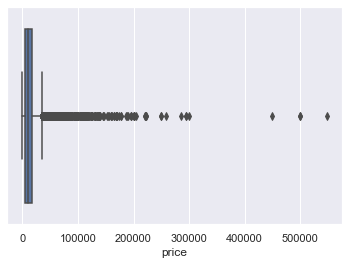

In [26]:
sns.boxplot(data.price)

In [27]:
data[data['price'] > 200000]

,car,price,body,mileage,engV,engType,registration,year,model,drive
564,Mercedes-Benz,250000.0,other,6,5.50,Petrol,yes,2016,S 63 AMG,full
567,Mercedes-Benz,249999.0,other,3,5.50,Petrol,yes,2016,S 63 AMG,full
637,Bentley,222222.0,other,0,6.00,Petrol,yes,2015,Continental,full
1478,Bentley,259000.0,sedan,0,6.00,Petrol,yes,2014,Flying Spur,full
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1891,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S 600,rear
2165,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S-Guard,rear
2343,Mercedes-Benz,219900.0,crossover,30,6.30,Petrol,yes,2013,G 63 AMG,full
3909,Mercedes-Benz,219900.0,crossover,33,5.50,Petrol,yes,2013,G 63 AMG,full
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full


In [28]:
data.describe()

,price,mileage,engV,year
count,8739.000000,8739.000000,8739.000000,8739.000000
mean,15733.542261,140.095434,2.588607,2006.609681
std,24252.904810,97.892213,5.416670,6.968947
min,0.000000,0.000000,0.100000,1959.000000
25%,5000.000000,71.000000,1.600000,2004.000000
50%,9250.000000,130.000000,2.000000,2008.000000
75%,16800.000000,195.500000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


<AxesSubplot:>

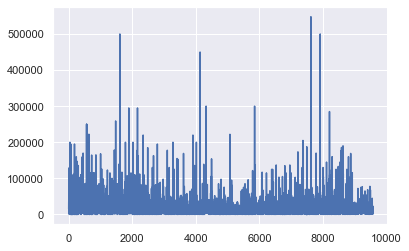

In [29]:
df.price.plot()

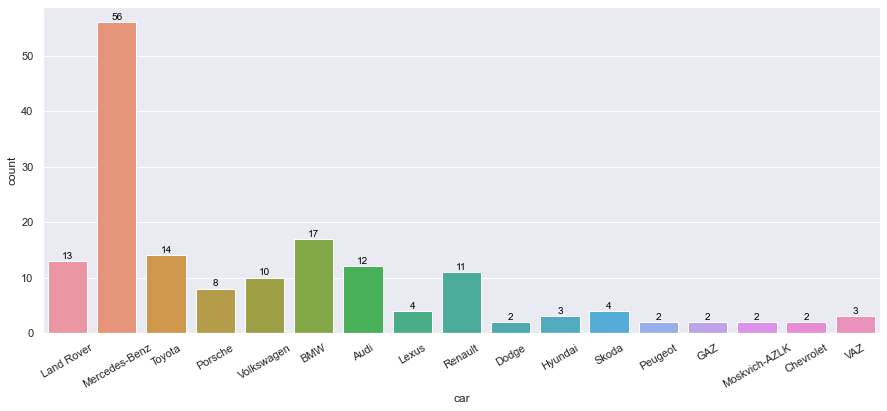

In [30]:
cheap = data[data['price'] < 500]
outliers = cheap['model'].value_counts()
outliers = outliers[outliers <= 1].index
cheap = cheap.loc[~cheap['model'].isin(outliers)]

fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation=30)
chart = sns.countplot(x='car', data=cheap)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

Можно заметить, что дешёвый ВАЗ, АЗЛК и ЗАЗ ещё могут стоить ниже 500$ поэтому посмотрим машины, которые стоят 0:

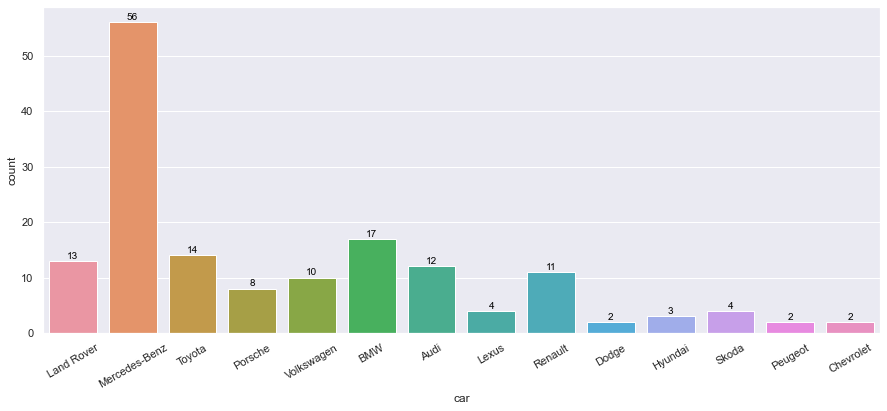

In [31]:
cheap = data[data['price'] == 0]
outliers = cheap['model'].value_counts()
outliers = outliers[outliers <= 1].index
cheap = cheap.loc[~cheap['model'].isin(outliers)]

fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation=30)
chart = sns.countplot(x='car', data=cheap)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

### Make the new columns with mean price for cars

In [28]:
df = pd.read_csv('data/car_ad.csv')
df.shape

(9576, 10)

In [5]:
df = df.loc[(df.price > 300) & (df.price < df.price.quantile(0.99))]

In [6]:
df.groupby("car").mean().sort_values(by='price', ascending=False).price

car
Maserati         110000.000000
Bentley           70506.875000
Tesla             68473.333333
Aston Martin      65000.000000
Porsche           48065.875000
                     ...      
�UAZ               2709.350000
Lancia             2166.666667
Moskvich-AZLK      1751.818182
Moskvich-Izh       1176.102590
Wartburg           1000.000000
Name: price, Length: 83, dtype: float64

In [25]:
mean_prices = df.groupby("car").price.mean()
print(mean_prices)
mean_prices.to_csv('mean_car_prices.csv')
mean_prices = pd.read_csv('mean_car_prices.csv', index_col = 0, squeeze = True)
print(mean_prices)

def mean_apply(x):
    for value in mean_prices.items():
        if x == value[0]:
            return value[1]       

df['mean_model_price'] = df.car.apply(mean_apply)
df

# df.mean_model_price = df.groupby("car").price.transform('mean')
# df.mean_model_price

car
Acura           18554.384615
Alfa Romeo       9040.818182
Aro              3600.000000
Aston Martin    65000.000000
Audi            18489.633484
                    ...     
Volvo           18586.562500
Wartburg         1000.000000
ZAZ              3216.639190
ZX               7700.000000
�UAZ             2709.350000
Name: price, Length: 83, dtype: float64
car
Acura           18554.384615
Alfa Romeo       9040.818182
Aro              3600.000000
Aston Martin    65000.000000
Audi            18489.633484
                    ...     
Volvo           18586.562500
Wartburg         1000.000000
ZAZ              3216.639190
ZX               7700.000000
�UAZ             2709.350000
Name: price, Length: 83, dtype: float64


,car,price,body,mileage,engV,engType,registration,year,model,drive,mean_model_price
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,10599.573446
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,22073.523039
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,22073.523039
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,22073.523039
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN,22073.523039
...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front,12629.368135
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,13125.267913
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full,22073.523039
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front,25547.620859


In [32]:
cheap = data[(data['price'] < 300) & (data['mileage'] == 0) & (data['year'] == 2016)].car
cheap.value_counts()

Mercedes-Benz    21
Toyota            5
BMW               4
Land Rover        3
Lexus             3
Hyundai           3
Audi              1
Porsche           1
Name: car, dtype: int64

Что ж, можно сказать, что эти машины являются новыми, так как пробега нет, год последний (датасет до 2016 года), а цена 0. Или же просто некорректно выставлены эти признаки. Но непонятно почему тогда они попали в этот датасет с бу машинами, разве что автосалоны как рекламу выложили объявления. Так как целью является определение оценочной стоимости по рынку бу машин в Украине, то правильным решением станет отбросить машины с ценой ниже 300 и пробегом 0 миль.

In [148]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, ' ==> ', len(df[col].unique()))

Ок, значит car & model будет LabelEncoding, остальноё OneHotEncoding. upd: отказался, так как особого профита нет. Теперь всё LabelEncoder

### Write function and start train models 

In [19]:
# Пришлось упростить подготовку данных, чтоб сделать простую спецификацию для автоматической проверки проекта

def preprocess(df, label=True):
    # fill nans
    df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
    df['engV'] = df['engV'].fillna(df['engV'].median())
    
    # remove outliers
    df = df[df['mileage'].between(df['mileage'].quantile(0.05) , df['mileage'].quantile(0.95))]
    df = df[df.engV.between(df['engV'].quantile(0), df['engV'].quantile(0.99))]
    
    # Label Encoder
    if label:
        for c in df.columns:
            if df[c].dtype == 'object':
                lbl = preprocessing.LabelEncoder()
                lbl.fit(list(df[c].values)) 
                df[c] = lbl.transform(list(df[c].values))
    
    return df

In [22]:
def load_data(splitted=True, labeled=True):
    '''
    df - dataset
    splitted:
        if True, then get splitted data train.csv & val.csv
        else take all dataset
    '''
    if splitted:
        df_train = pd.read_csv('data/train.csv')
        df_test = pd.read_csv('data/val.csv')
        df_train = preprocess(df_train, labeled)
        df_test = preprocess(df_test, labeled)

        X_train = df_train.drop(columns=['price'], axis=0)
        y_train = df_train['price']

        X_test = df_test.drop(columns=['price'], axis=0)
        y_test = df_test['price']
        return X_train, X_test, y_train, y_test
    else:
        df = pd.read_csv('data/car_ad.csv')
        df = preprocess(df, labeled)
        X = df.drop(columns=['price'], axis=0)
        y = df['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)
        return X_train, X_test, y_train, y_test

In [23]:
# Metric for regression
from sklearn.metrics import make_scorer

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [24]:
X_train, X_test, y_train, y_test = load_data()

KNeighborsRegressor(n_neighbors=4) , MAPE:  44.22267320278519
SVR() , MAPE:  93.8002722036617
DecisionTreeRegressor() , MAPE:  25.06415897738794
RandomForestRegressor() , MAPE:  19.258298573571913
AdaBoostRegressor() , MAPE:  130.56325446452018
GradientBoostingRegressor() , MAPE:  25.312440735635693
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) , MAPE:  18.967459773905137
LinearRegression() , MAPE:  78.46732725167013


<AxesSubplot:title={'center':'Classifier Accuracy (less is better)'}, xlabel='Accuracy', ylabel='Classifier'>

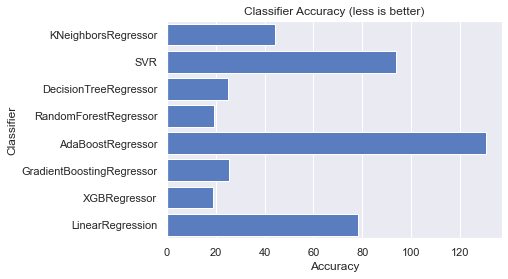

In [219]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


classifiers = [
    KNeighborsRegressor(4),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    LinearRegression()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for model in classifiers:
    name = model.__class__.__name__
    
    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('model', model)])

    acc = -1 * cross_val_score(my_pipeline, X_train, y_train,
                                  cv=5,
                                  scoring=mape).mean()
    
    print(model, ', MAPE: ', acc)
    
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title("Classifier Accuracy (less is better)")

sns.set_color_codes("muted")
sns.barplot(x = "Accuracy", y = 'Classifier', data = log, color = "b")


Теперь, так как XGBRegressor и RandomForest показали себя с наилучшей стороны в базовой конфигурации, подберём наилучшие параметры методом GridSearchCV для этих моделей.

In [221]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

parameters = {'nthread':[2],
              'objective':['reg:squarederror'],
              'learning_rate': [0.01, 0.03, 0.05], 
              'max_depth': [5,9,12],
              'min_child_weight': [1,5],
              'subsample': [0.75],
              'colsample_bytree': [1],
              'n_estimators': [1000],
              'eval_metric': ["mape"]}

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring=mape,
                   verbose=2, refit=True)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [1], 'eval_metric': ['mape'],
                         'learning_rate': [0.01, 0.03, 0.05],

In [222]:
clf.best_score_

-17.62049552319467

In [223]:
clf.best_params_

{'colsample_bytree': 1,
 'eval_metric': 'mape',
 'learning_rate': 0.01,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'nthread': 2,
 'objective': 'reg:squarederror',
 'subsample': 0.75}

### Best params for XGBoostRegressor
---
```python
{'colsample_bytree': 1,
 'eval_metric': 'mape',
 'learning_rate': 0.01,
 'max_depth': 15,
 'min_child_weight': 1,
 'n_estimators': 500,
 'nthread': 2,
 'objective': 'reg:squarederror',
 'subsample': 0.75}
 ```
 ---

### Dump model params

In [854]:
import pickle

pickle.dump(clf, open("xgbr.pickle", "wb"))

###  Grid search and train Random Forest model

In [630]:
random_forest_model = RandomForestRegressor()

parameters = {
    'bootstrap': [True, False],
    'max_depth': [30, 60, 90, 120],
    'max_features': [3, 6, 9],
    'min_samples_leaf': [4, 5, 7],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000]
}

rf_grid = GridSearchCV(random_forest_model, parameters, n_jobs=-1, 
                   cv=5, 
                   scoring=mape,
                   verbose=1)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [30, 60, 90, 120],
                         'max_features': [3, 6, 9],
                         'min_samples_leaf': [4, 5, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 500, 1000]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
             verbose=1)

In [631]:
rf_grid.best_score_

-16.194920435713605

In [652]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 120,
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [633]:
rf_pred = rf_grid.predict(X_test)
print(mean_absolute_percentage_error(y_test, rf_pred))

15.94413469278999


In [636]:
pickle.dump(rf_grid, open("random_forest.pickle.dat", "wb"))

Как видно, RandomForest дал неплохой результат на тестовой выборке MEPA:15.94%, но XGBRegressor обеспечил результатом MEPA:14.35%, поэтому будем использовать его. Вероятно можно было улучшить результат, использовав OHEncoder и добавив ещё какие-то признаки, но этого должно быть достаточно для поставленной задачи.

### Try to log target function and train XGBRegressor with the best params

In [658]:
best_params = {
     'colsample_bytree': [1],
     'eval_metric': ['mape'],
     'learning_rate': [0.01],
     'max_depth': [15],
     'min_child_weight': [1],
     'n_estimators': [500],
     'nthread': [2],
     'objective': ['reg:squarederror'],
     'subsample': [0.75]}

y_train_log, y_test_log = np.log(y_train), np.log(y_test)

xgb_log_model = XGBRegressor()

clf_log = GridSearchCV(xgb_log_model, best_params, n_jobs=5, 
                   cv=5, 
                   scoring=mape,
                   verbose=2, refit=True)

clf_log.fit(X_train, y_train_log)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [1], 'eval_metric': ['mape'],
                         'learning_rate': [0.01], 'max_depth'

In [663]:
pred_log = clf_log.predict(X_test)
pred_log

array([9.011049, 6.66748 , 8.79062 , ..., 7.678837, 9.234566, 9.21235 ],
      dtype=float32)

In [668]:
print(mean_absolute_percentage_error(np.exp(y_test_log), np.exp(pred_log)))

14.527449112900086


В логарифмировании ЦФ не оказалось смысла.

### Experiments with the best model

In [10]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


best_params = {
     'colsample_bytree': [1],
     'eval_metric': ['mape'],
     'learning_rate': [0.01],
     'max_depth': [9],
     'min_child_weight': [1],
     'n_estimators': [1000],
     'nthread': [2],
     'objective': ['reg:squarederror'],
     'subsample': [0.75]}

xgb_model = XGBRegressor()

clf = GridSearchCV(xgb_model, best_params, n_jobs=5, 
                   cv=5, 
                   scoring=mape,
                   verbose=2, refit=True)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [1], 'eval_metric': ['mape'],
                         'learning_rate': [0.01], 'max_depth'

In [11]:
clf.best_score_

-16.957477233684607

In [12]:
pred = clf.predict(X_test)
print(mean_absolute_percentage_error(y_test, pred))

19.565934495780418


### Version of estimator without GridSearch  and CV

In [25]:
from xgboost import XGBRegressor

best_params = {
     'colsample_bytree': 1,
     'eval_metric': 'mape',
     'learning_rate': 0.01,
     'max_depth': 9,
     'min_child_weight': 1,
     'n_estimators': 1000,
     'nthread': 2,
     'objective': 'reg:squarederror',
     'subsample': 0.75}

xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
print(mean_absolute_percentage_error(y_test, pred))

20.67783882328976


### Save trained model in Pickle

In [29]:
import pickle

pickle.dump(xgb_model, open("models/xgbr.pickle", "wb"))

In [28]:
df = pd.read_csv("data/car_ad.csv")
df = df.loc[(df.price > 300) & (df.price < df.price.quantile(0.99))]
# df['mean_model_price'] = df.groupby("car").price.transform(np.mean).astype(int)
df['price'] = df['price'].astype(int)

In [29]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(df, train_size=0.8, random_state=27)
data_train.drop(columns=['price',])
data_train.to_csv("data/train.csv", index=False)
data_val.to_csv("data/val.csv", index=False)

<AxesSubplot:>

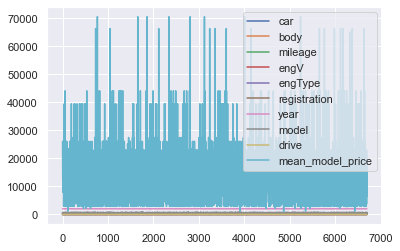

In [28]:
X_train.p

In [50]:
# Save unique values in category columns in csv
uniq_vals = df.select_dtypes(include='object').apply(lambda x: pd.Series(pd.unique(x))).fillna('')

uniq_vals.to_csv("data/unique_cat_vals.csv")

uniq_vals

,car,body,engType,registration,model,drive
0,Fiat,van,Diesel,yes,Scudo ����.,front
1,Mitsubishi,crossover,Petrol,no,Pajero Wagon,full
2,Toyota,sedan,Gas,,Camry,rear
3,Lexus,hatch,Other,,RX 350,
4,Nissan,vagon,,,Avalon,
...,...,...,...,...,...,...
782,,,,,Ideal,
783,,,,,3221 GAZ���,
784,,,,,4Runner,
785,,,,,300,


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Fiat,5100,van,175,1.9,Diesel,yes,2002,Scudo ����.,front
1,Mitsubishi,11300,crossover,209,3.5,Petrol,yes,1999,Pajero Wagon,full
2,Toyota,20500,sedan,105,2.5,Petrol,yes,2013,Camry,front
3,Lexus,17500,crossover,150,NaN,Gas,yes,2007,RX 350,full
4,Toyota,15400,sedan,152,3.5,Gas,yes,2007,Avalon,front
...,...,...,...,...,...,...,...,...,...,...
7362,Hyundai,10200,other,82,2.0,Gas,yes,2008,Coupe,front
7363,Volkswagen,34899,vagon,0,2.0,Petrol,yes,2016,Passat B8,front
7364,Mercedes-Benz,7300,other,250,2.2,Diesel,yes,2005,Sprinter 311 ����.,NaN
7365,Chevrolet,5250,sedan,110,1.5,Petrol,no,2006,Aveo,front
